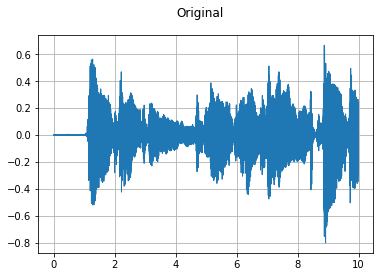

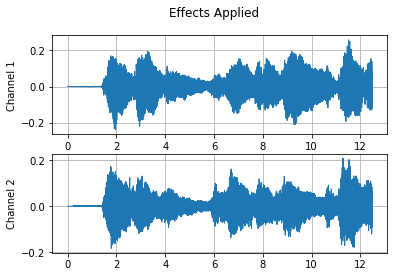

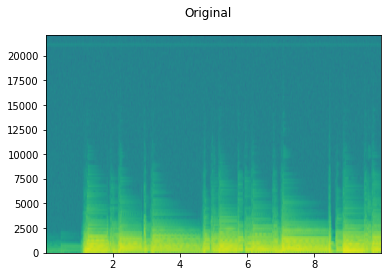

/home/jamesc/PycharmProjects/AEGuitarEffect/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


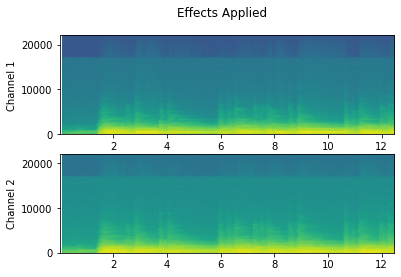

----------
Source: Original
----------
Sample Rate: 44100
Shape: (1, 440320)
Dtype: torch.float32
 - Max:      0.665
 - Min:     -0.803
 - Mean:    -0.000
 - Std Dev:  0.096

tensor([[0.0003, 0.0003, 0.0003,  ..., 0.0545, 0.0472, 0.0399]])

----------
Source: Effects Applied
----------
Sample Rate: 44100
Shape: (2, 550400)
Dtype: torch.float32
 - Max:      0.258
 - Min:     -0.239
 - Mean:    -0.000
 - Std Dev:  0.040

tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0572, -0.0582, -0.0592],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0063,  0.0099,  0.0141]])



In [2]:
import torchaudio
import torch

from utils import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

WAV_PATH = 'input_data/train.wav'

waveform1, sample_rate1 = torchaudio.load(WAV_PATH)

waveform1 = waveform1[0].unsqueeze(0)

effects = [
  ["lowpass", "-1", "1000"], # apply single-pole lowpass filter
  ["speed", "0.8"],  # reduce the speed
                     # This only changes sample rate, so it is necessary to
                     # add `rate` effect with original sample rate after this.
  ["rate", f"{sample_rate1}"],
  ["reverb", "-w"],  # Reverbration gives some dramatic feeling
]

# Apply effects
waveform2, sample_rate2 = torchaudio.sox_effects.apply_effects_tensor(
    waveform1, sample_rate1, effects)

plot_waveform(waveform1, sample_rate1, title="Original")
plot_waveform(waveform2, sample_rate2, title="Effects Applied")
plot_specgram(waveform1, sample_rate1, title="Original")
plot_specgram(waveform2, sample_rate2, title="Effects Applied")
print_stats(waveform1, sample_rate=sample_rate1, src="Original")
print_stats(waveform2, sample_rate=sample_rate2, src="Effects Applied")

play_audio(waveform1, sample_rate1)
play_audio(waveform2, sample_rate2)